In [1]:
import keras

# 뉴스 기사 분류: 다중 분류 문제

## 로이터 데이터셋
1986년 로이터에서 공개한 짧은 기사와 토픽의 집합
텍스트 분류에 널리 이용


In [2]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


In [5]:
len(train_data)

8982

In [6]:
len(test_data)

2246

In [7]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [4]:


word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# 0, 1, 2는 '패딩', '문서 시작', '사전에 없음'을 위한 인덱스이므로 3을 뺍니다
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])



565248/550378 [==============================] - 0s 0us/step


In [8]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

## 데이터 준비
### 레이블을 벡터로 바꾸는 방법
    1. 리스트 --> 정수 텐서로 변환 2. 원-핫 인코딩

In [10]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# 훈련 데이터 벡터 변환
x_train = vectorize_sequences(train_data)
# 테스트 데이터 벡터 변환
x_test = vectorize_sequences(test_data)

In [11]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# 훈련 레이블 벡터 변환
one_hot_train_labels = to_one_hot(train_labels)
# 테스트 레이블 벡터 변환
one_hot_test_labels = to_one_hot(test_labels)

In [12]:


from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)



## 모델 구성
### 출력공간 차원이 커짐: 클래스 개수 2-->46

Dense 층을 쌓으면 각 층은 이전 층의 출력에서 제공한 정보만 사용할 수 있음. 
한 층이 분류 문제에 필요한 정보를 누락하면 그 다음 층에서 복원 불가.
16차원 공간이 46개 클라스 구분하기엔 제약이 커 규모를 늘리자. 

In [13]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

- 마지막 Dense 층 크기 : 46 --> 각 입력 샘플에 대해 46차원 벡터 출력 
- 마지막 층에 softmax 활성함수 --> output[i]는 어떤 샘플이 클래스 i에 속할 확률(46개읭 값을 모두 더하면 1)'

--> 최선의 손실함수는 categorial_crossentropy
: 두 확률 분포 사이의 거리를 최소화하여 진짜 레이블에 가까운 출력을 내도록 모델을 훈련

In [14]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## 훈련검증
훈련 데이터 1000개에사 샘플을 떼어 검증

In [15]:


x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]



In [16]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 34ms/step - loss: 2.6077 - accuracy: 0.5134 - val_loss: 1.7437 - val_accuracy: 0.6330
Epoch 2/20
16/16 [==============================] - 0s 24ms/step - loss: 1.4139 - accuracy: 0.7063 - val_loss: 1.3007 - val_accuracy: 0.7150
Epoch 3/20
16/16 [==============================] - 0s 25ms/step - loss: 1.0495 - accuracy: 0.7717 - val_loss: 1.1324 - val_accuracy: 0.7610
Epoch 4/20
16/16 [==============================] - 0s 24ms/step - loss: 0.8314 - accuracy: 0.8225 - val_loss: 1.0381 - val_accuracy: 0.7760
Epoch 5/20
16/16 [==============================] - 0s 24ms/step - loss: 0.6643 - accuracy: 0.8616 - val_loss: 0.9692 - val_accuracy: 0.7960
Epoch 6/20
16/16 [==============================] - 0s 24ms/step - loss: 0.5326 - accuracy: 0.8894 - val_loss: 0.9393 - val_accuracy: 0.8040
Epoch 7/20
16/16 [==============================] - 0s 24ms/step - loss: 0.4292 - accuracy: 0.9098 - val_loss: 0.8965 - val_accuracy: 0.8160
Epoch 8/20
16

In [17]:


import matplotlib.pyplot as plt



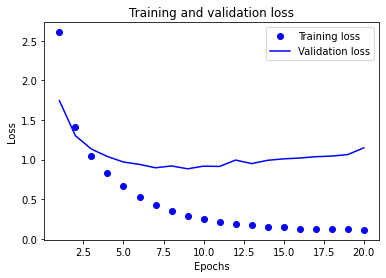

In [18]:


loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()



In [20]:
##9이상부터 과대적합이 일어남

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)



Epoch 1/9
16/16 [==============================] - 1s 31ms/step - loss: 2.6570 - accuracy: 0.5273 - val_loss: 1.7586 - val_accuracy: 0.6530
Epoch 2/9
16/16 [==============================] - 0s 23ms/step - loss: 1.4139 - accuracy: 0.7105 - val_loss: 1.2969 - val_accuracy: 0.7160
Epoch 3/9
16/16 [==============================] - 0s 24ms/step - loss: 1.0304 - accuracy: 0.7855 - val_loss: 1.1376 - val_accuracy: 0.7640
Epoch 4/9
16/16 [==============================] - 0s 24ms/step - loss: 0.8084 - accuracy: 0.8360 - val_loss: 1.0305 - val_accuracy: 0.7920
Epoch 5/9
16/16 [==============================] - 0s 25ms/step - loss: 0.6423 - accuracy: 0.8700 - val_loss: 0.9941 - val_accuracy: 0.8060
Epoch 6/9
16/16 [==============================] - 0s 24ms/step - loss: 0.5107 - accuracy: 0.8974 - val_loss: 0.9369 - val_accuracy: 0.8140
Epoch 7/9
16/16 [==============================] - 0s 23ms/step - loss: 0.4091 - accuracy: 0.9171 - val_loss: 0.9231 - val_accuracy: 0.8130
Epoch 8/9
16/16 [===

In [21]:
results

[1.0051789283752441, 0.7858415246009827]

정확도 78%(랜덤 분류: 19%)

In [22]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.17275155832591274

# 새로운 데이터 예측하기

모델 인스턴스의 predict 메서드는 46개 토픽에 대한 확률 분포를 반환

In [23]:
predictions = model.predict(x_test)

In [24]:
predictions[0].shape

(46,)

In [25]:
np.argmax(predictions[0])

3

가장 큰 값 --> 예측클래스 (가장 확률 높은 클래스)

# 레이블과 손실을 다루는 다른 방법

다른 방법으로 정수텐서 변환하기
- 손실함수만 바꾸면 된다. sparse_categorical_crossentropy

In [26]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [27]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

인터페이스만 다를 뿐 categorical_crossentropy와 동일

## 충분히 큰 중간층을 두어야 하는 이유

마지막 출력이 46차원이기 때문에 중간층의 히든유닛 46개 보다 많이 적어서는 안된다. (병목현상 위험)

In [28]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 13ms/step - loss: 3.2601 - accuracy: 0.2096 - val_loss: 2.6822 - val_accuracy: 0.3800
Epoch 2/20
63/63 [==============================] - 1s 10ms/step - loss: 2.2293 - accuracy: 0.3905 - val_loss: 1.9988 - val_accuracy: 0.3940
Epoch 3/20
63/63 [==============================] - 1s 11ms/step - loss: 1.7274 - accuracy: 0.4589 - val_loss: 1.6650 - val_accuracy: 0.5580
Epoch 4/20
63/63 [==============================] - 1s 10ms/step - loss: 1.4041 - accuracy: 0.6585 - val_loss: 1.4687 - val_accuracy: 0.6580
Epoch 5/20
63/63 [==============================] - 1s 10ms/step - loss: 1.2254 - accuracy: 0.6809 - val_loss: 1.3978 - val_accuracy: 0.6580
Epoch 6/20
63/63 [==============================] - 1s 10ms/step - loss: 1.1198 - accuracy: 0.6921 - val_loss: 1.3872 - val_accuracy: 0.6560
Epoch 7/20
63/63 [==============================] - 1s 10ms/step - loss: 1.0462 - accuracy: 0.7012 - val_loss: 1.3794 - val_accuracy: 0.6580
Epoch 8/20
63

# 정리

- N개의 클래스로 데이터 포인트를 분류하려면 네트워크 마지막 Dense층의 크기는 N
- 단일 레이블, 다중 분류 문제에서는 Nㅐ의 클래스에 대한 확률 분포를 출력하기 위해 softmax활성화 함수 이용
- 범주형 크로스엔트로피 : 모델이 출력한 확률 분포와 타깃 분포사이의 거리를 최소화
- 다중 분류 레이블 다루는 방법
    - 원-핫 인코딩 : categorical_crossentropy 손실 함수를 사용
    - 레이블 --> 정수로 인코딩 : sparse_categorical_crossentropy 손실 함수를 사용
- 많은 수의 범주를 분류 시 중간층읰 크기가 너무 작아 네트워크에 정보의 병목이 생기지 않도록 주의!
